In [ ]:
!pip install opendatasets

Downloading the dataset from Kaggle and importing packages

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import nltk
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

od.download("https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset")
nltk.download('stopwords')
nltk.download('punkt')

Skipping, found downloaded files in "./sms-spam-collection-dataset" (use force=True to force download)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data=pd.read_csv('sms-spam-collection-dataset/spam.csv',header=0,encoding='ISO-8859-1')
data=pd.DataFrame(data)
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data=data.drop('Unnamed: 2',1)
data=data.drop('Unnamed: 3',1)
data=data.drop('Unnamed: 4',1)
data.head()

<ipython-input-67-279c678b3381>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data=data.drop('Unnamed: 2',1)
<ipython-input-67-279c678b3381>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data=data.drop('Unnamed: 3',1)
<ipython-input-67-279c678b3381>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data=data.drop('Unnamed: 4',1)


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.shape
data.info()
data.isnull().sum()
count = data.v1.value_counts()
count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


ham     4825
spam     747
Name: v1, dtype: int64

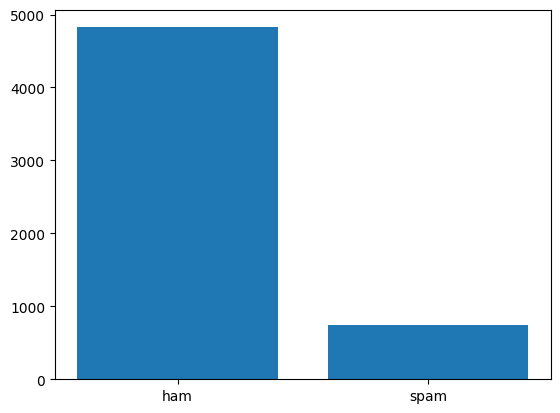

In [ ]:
plt.bar(count.index,count)
plt.show()

In [ ]:
data.columns=['type','message']
data.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
stemmer = PorterStemmer()
data['Category']=data['type'].map({'ham': 0, 'spam': 1})
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    current = []
    for i in text:
        if i.isalnum():
            current.append(i)
    text = current[:]
    current.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            current.append(i)
    for i in text:
        current.append(stemmer.stem(i))
    return " ".join(current)
data['message']=data['message'].apply(lambda i: transform_text(i))

In [ ]:
data

,type,message,Category
0,ham,go jurong point crazy available bugis n great ...,0
1,ham,ok lar joking wif u oni ok lar joke wif u oni,0
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,1
3,ham,u dun say early hor u c already say u dun say ...,0
4,ham,nah think goes usf lives around though nah i d...,0
...,...,...,...
5567,spam,2nd time tried 2 contact u pound prize 2 claim...,1
5568,ham,b going esplanade fr home will b go to esplana...,0
5569,ham,pity mood suggestions piti wa in mood for that...,0
5570,ham,guy bitching acted like interested buying some...,0


In [ ]:
vectorizer = TfidfVectorizer()
X=data['message'].tolist()
y=data['Category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfid = vectorizer.fit_transform(X_train)
X_test_tfid = vectorizer.transform(X_test)

scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_tfid)

print(X_train_tfid)

  (0, 5299)	0.23768692774675942
  (0, 5600)	0.10219555997687556
  (0, 5688)	0.12259480866417619
  (0, 4982)	0.09121544810592716
  (0, 5169)	0.1947843811042981
  (0, 5280)	0.09536482957312406
  (0, 1071)	0.10831683552793385
  (0, 3843)	0.14471649302824002
  (0, 6775)	0.17093394949811042
  (0, 7885)	0.07956666015934746
  (0, 4101)	0.08729592209123237
  (0, 5429)	0.11414127576774881
  (0, 5300)	0.23768692774675942
  (0, 3726)	0.35789663815221706
  (0, 8903)	0.3558862105896923
  (0, 1838)	0.33184134571799173
  (0, 5172)	0.23107050572788845
  (0, 7491)	0.2703141310956671
  (0, 1430)	0.47537385549351885
  (1, 4233)	0.06559623865285713
  (1, 7878)	0.07358392345198449
  (1, 5709)	0.11847729908016216
  (1, 8320)	0.08546971991623892
  (1, 5023)	0.1553852230240662
  (1, 5687)	0.10392386569148565
  :	:
  (4453, 7297)	0.3467126465674116
  (4453, 4550)	0.7208201731888357
  (4453, 1658)	0.4898968864408707
  (4454, 7294)	0.24760133406273122
  (4454, 6418)	0.2261915640573015
  (4454, 7303)	0.2476013340


Model Name:
<class 'sklearn.tree._classes.DecisionTreeClassifier'> 


Test Accuracy 

0.967713004484305 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       965
           1       0.89      0.87      0.88       150

    accuracy                           0.97      1115
   macro avg       0.93      0.93      0.93      1115
weighted avg       0.97      0.97      0.97      1115


Confusion_matrix 



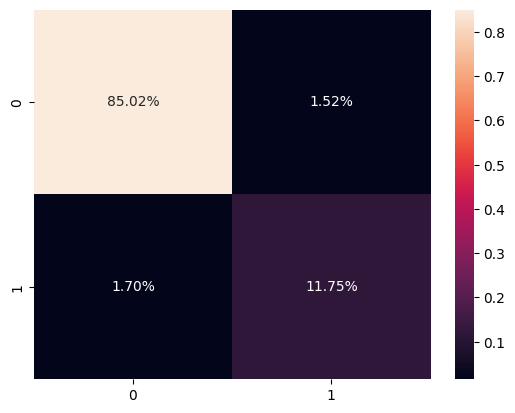


Model Name:
<class 'sklearn.ensemble._forest.RandomForestClassifier'> 


Test Accuracy 

0.9721973094170404 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.99      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115


Confusion_matrix 



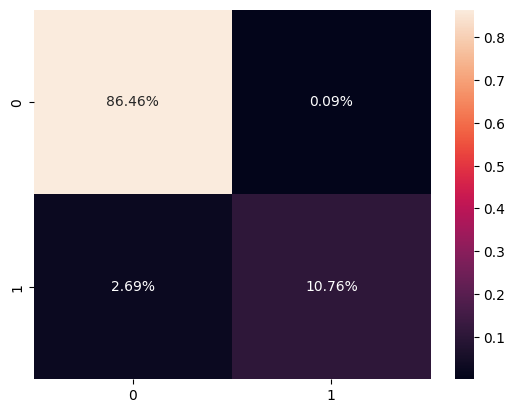


Model Name:
<class 'sklearn.linear_model._logistic.LogisticRegression'> 


Test Accuracy 

0.9560538116591928 

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       965
           1       0.97      0.69      0.81       150

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.89      1115
weighted avg       0.96      0.96      0.95      1115


Confusion_matrix 



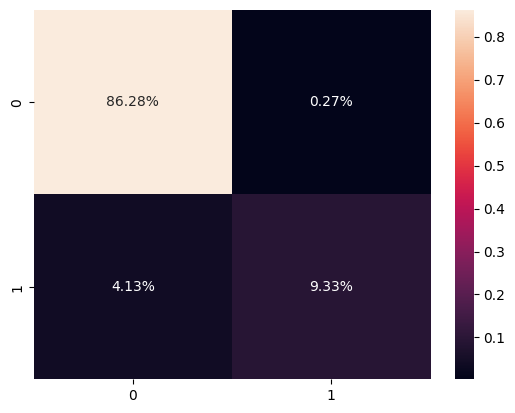


Model Name:
<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'> 


Test Accuracy 

0.9838565022421525 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Confusion_matrix 



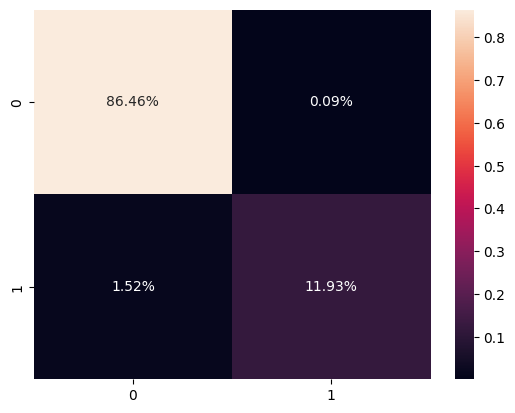


Model Name:
<class 'sklearn.ensemble._forest.ExtraTreesClassifier'> 


Test Accuracy 

0.9766816143497757 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Confusion_matrix 



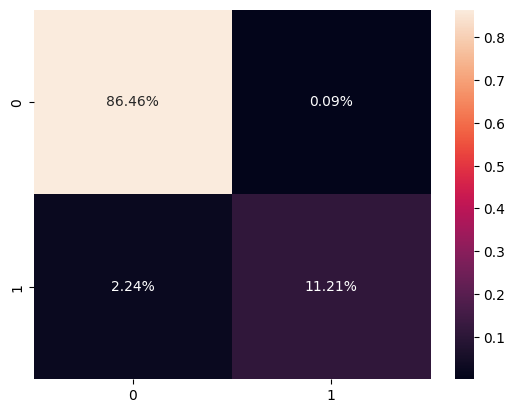


Model Name:
<class 'sklearn.naive_bayes.MultinomialNB'> 


Test Accuracy 

0.9605381165919282 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.71      0.83       150

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115


Confusion_matrix 



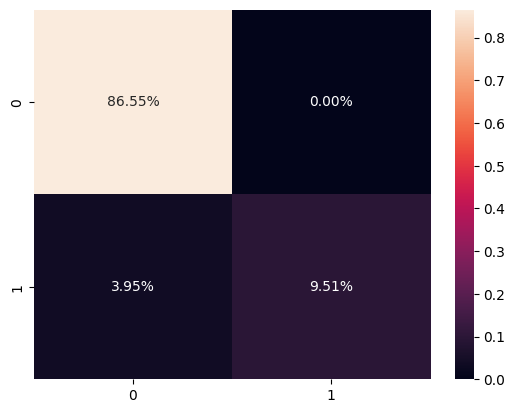


Model Name:
<class 'sklearn.svm._classes.SVC'> 


Test Accuracy 

0.97847533632287 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Confusion_matrix 



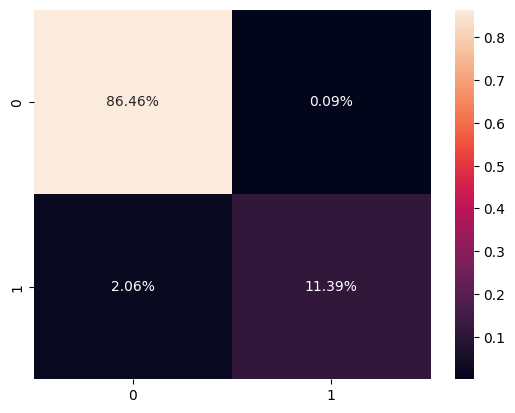


Model Name:
<class 'xgboost.sklearn.XGBClassifier'> 


Test Accuracy 

0.9748878923766816 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.98      0.83      0.90       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115


Confusion_matrix 



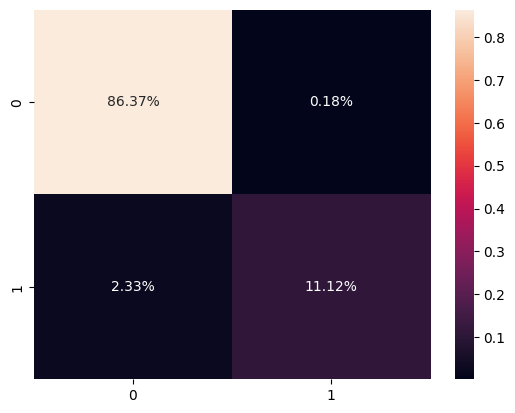

In [ ]:
models = [DecisionTreeClassifier,RandomForestClassifier,LogisticRegression,SGDClassifier,
         ExtraTreesClassifier, MultinomialNB, SVC, XGBClassifier]
accuracy_test=[]
for m in models:
    print(f'\nModel Name:')
    print(str(m),'\n')
    model_ = m()
    model_.fit(X_train_tfid, y_train)
    pred = model_.predict(X_test_tfid)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('\nTest Accuracy \n')
    print(acc,'\n')
    print(classification_report(y_test, pred))
    print('\nConfusion_matrix \n')
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()

In [ ]:
classifier = SGDClassifier()
classifier.fit(X_train_tfid, y_train)
pred = classifier.predict(X_test_tfid)
acc = accuracy_score(pred, y_test)
print(confusion_matrix(y_test,pred))

[[963   2]
 [ 17 133]]


In [ ]:
print('Accuracy : ',(acc*100))
print(classification_report(y_test, pred))

Accuracy :  98.29596412556054
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
import joblib
joblib.dump(classifier, 'SGDC_spamMSG_classifier.pkl',compress=3)


['SGDC_spamMSG_classifier.pkl']

In [ ]:
msg=input()
msg = [transform_text(msg)]
msg = vectorizer.transform(msg)


SGDC_spamMSG_classifier = open('SGDC_spamMSG_classifier.pkl','rb')
model = joblib.load(SGDC_spamMSG_classifier)

predict_msg = model.predict(msg)

if predict_msg == 0:
    print("\nSafe msg")
else:
    print("\nALERT! spam msg")

 Subject: Urgent: Claim Your Prize Now!  Congratulations!  You've been selected as one of our lucky winners to claim a fabulous prize. Act fast to secure your reward before it's too late!  Prize Options:  $1000 Cash Prize Free Luxury Vacation Package iPhone 13 Pro Max To claim your prize, simply click the link below and follow the instructions. But hurry, this offer is only available for a limited time!  [Link to Claim Your Prize]  Don't miss out on this incredible opportunity. Claim your prize now and enjoy your reward!  Best regards, The Prize Claim Team

ALERT! spam msg
